# Day 2: Exploratory Data Analysis

This notebook explores relationships and distributions in the heart disease dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../data/heart.csv')

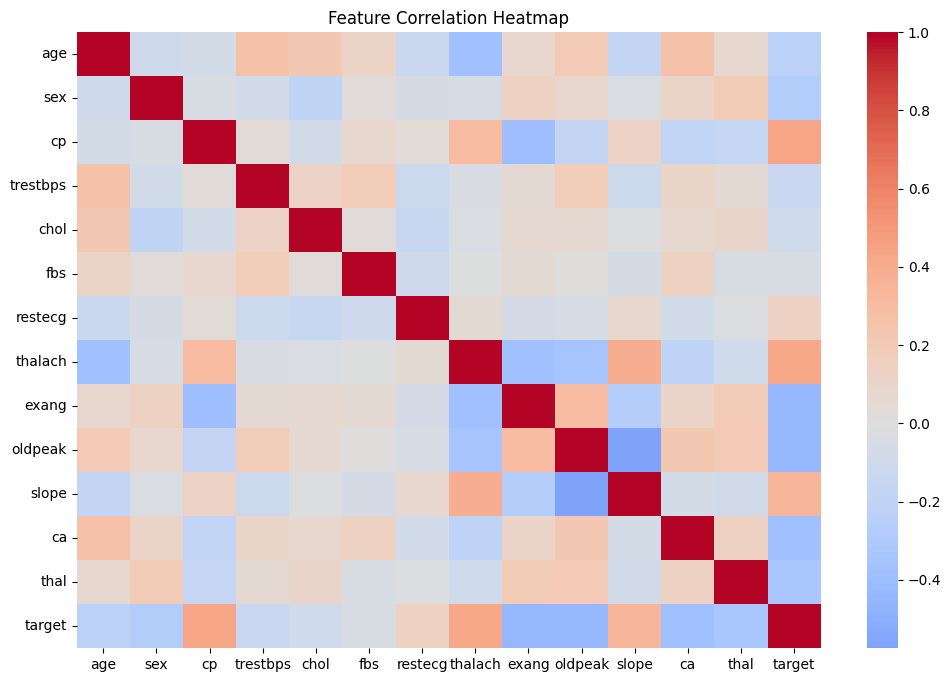

In [2]:
# Correlation heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

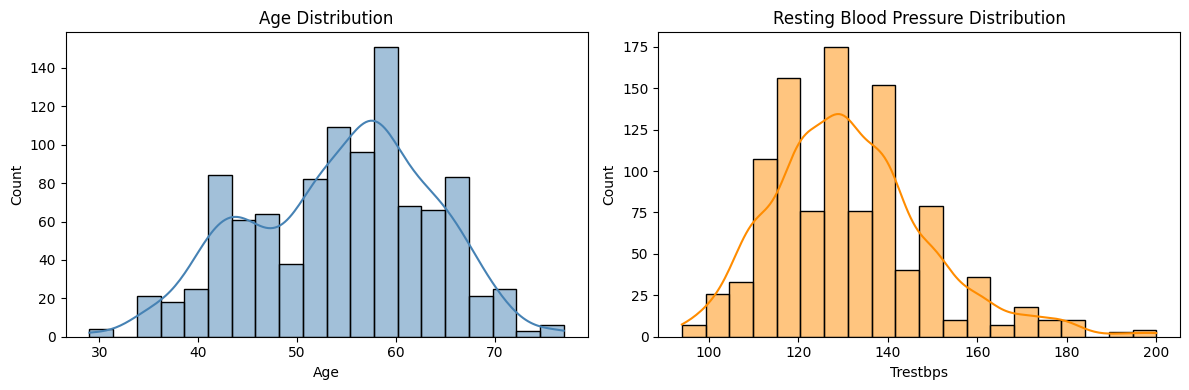

In [3]:
# Histograms for age and trestbps
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['age'], bins=20, kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')

sns.histplot(df['trestbps'], bins=20, kde=True, ax=axes[1], color='darkorange')
axes[1].set_title('Resting Blood Pressure Distribution')
axes[1].set_xlabel('Trestbps')

plt.tight_layout()
plt.show()

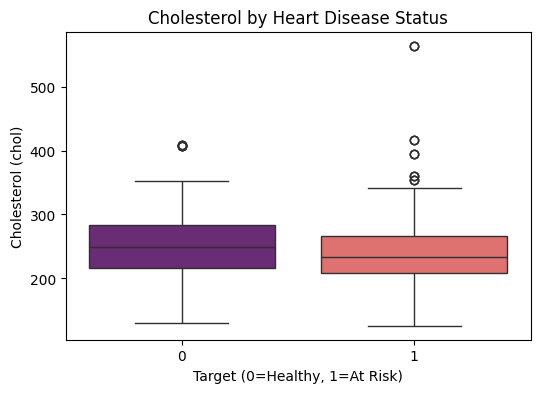

In [5]:
# Boxplot: cholesterol by target
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='target', y='chol', hue='target', palette='magma', legend=False)
plt.title('Cholesterol by Heart Disease Status')
plt.xlabel('Target (0=Healthy, 1=At Risk)')
plt.ylabel('Cholesterol (chol)')
plt.show()

In [ ]:
# Compare raw vs cleaned max values and top correlations
import pandas as pd

raw_df = pd.read_csv('../data/heart.csv')
clean_df = pd.read_csv('../data/heart_cleaned.csv')

max_compare = pd.DataFrame({
    'raw_max': raw_df[['chol', 'trestbps']].max(),
    'cleaned_max': clean_df[['chol', 'trestbps']].max()
})

print('Max value comparison (raw vs cleaned):')
print(max_compare)

corr = clean_df.corr(numeric_only=True)['target'].abs().sort_values(ascending=False)
print('\nTop 5 features by absolute correlation with target:')
print(corr.drop('target').head(5))

Max value comparison (raw vs cleaned):
          raw_max  cleaned_max
chol          564          371
trestbps      200          170

Top 5 features by absolute correlation with target:
oldpeak    0.438441
exang      0.438029
cp         0.434854
thalach    0.422895
ca         0.382085
Name: target, dtype: float64
